In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
import sklearn


In [2]:
#load data set
df=pd.read_csv('UNI.csv')
df

,Car_name,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,Tesla Model Y Long Range Dual Motor,535651,798186,3,78945.0,1.0,2.0,14.0,177.0,73.0,123,351318.0
1,Tesla Model 3,591911,861056,6,117220.0,5.0,9.0,9.0,148.0,74.0,95,285001.5
2,BYD ATTO 3,686990,770762,2,132538.0,2.0,8.0,15.0,181.0,53.0,97,215386.0
3,MG MG4 Electric 64 kWh,573999,722381,4,101065.0,4.0,3.0,11.0,197.0,54.0,116,244295.5
4,Tesla Model 3 Long Range Dual Motor,691388,811335,6,61559.0,3.0,9.0,12.0,160.0,53.0,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,NIO EL7 75 kWh,633238,743850,5,125092.0,1.0,6.0,11.0,171.0,95.0,97,190744.0
996,Mercedes EQA 300 4MATIC,599626,848195,4,83370.0,2.0,9.0,14.0,161.0,101.0,120,419748.0
997,Aiways U6,646344,842733,7,86722.0,1.0,8.0,9.0,196.0,113.0,89,405871.0
998,Porsche Taycan Turbo,535559,732439,2,140478.0,4.0,5.0,9.0,184.0,112.0,128,74398.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_name       1000 non-null   object 
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             998 non-null    float64
 5   rating         999 non-null    float64
 6   condition      998 non-null    float64
 7   economy        999 non-null    float64
 8   top speed      999 non-null    float64
 9   hp             999 non-null    float64
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(7), int64(4), object(1)
memory usage: 93.9+ KB


In [4]:
df.shape
df.describe()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.0000,1000.000000,998.000000,999.000000,998.000000,999.000000,999.000000,999.000000,1000.000000,1000.00000
mean,601648.286000,799131.3970,4.561000,100185.804609,2.989990,5.590180,11.624625,166.892893,84.538539,103.423000,308520.24250
std,58407.246204,57028.9502,1.719079,29112.212252,1.402081,2.822638,2.231635,19.298041,20.525859,21.058716,126073.25915
min,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.000000,50.000000,68.000000,28226.50000
25%,548860.500000,750997.7500,3.000000,74336.500000,2.000000,3.000000,10.000000,150.000000,67.000000,85.000000,206871.75000
50%,601568.000000,798168.0000,5.000000,100047.000000,3.000000,6.000000,12.000000,166.000000,84.000000,104.000000,306717.75000
75%,652267.250000,847563.2500,6.000000,124974.750000,4.000000,8.000000,13.000000,184.000000,102.000000,121.000000,414260.87500
max,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.000000,120.000000,140.000000,584267.50000


In [5]:
df.isna().sum()

,0
Car_name,0
on road old,0
on road now,0
years,0
km,2
rating,1
condition,2
economy,1
top speed,1
hp,1


In [6]:
#Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64','int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill null values in numerical columns with mean
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill null values in categorical columns with the most frequent value or a specific value
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])



In [7]:
df.isna().sum()

,0
Car_name,0
on road old,0
on road now,0
years,0
km,0
rating,0
condition,0
economy,0
top speed,0
hp,0


array([[<Axes: title={'center': 'on road old'}>,
        <Axes: title={'center': 'on road now'}>,
        <Axes: title={'center': 'years'}>],
       [<Axes: title={'center': 'km '}>,
        <Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'economy'}>,
        <Axes: title={'center': 'top speed'}>,
        <Axes: title={'center': 'hp'}>],
       [<Axes: title={'center': 'torque'}>,
        <Axes: title={'center': 'current price'}>, <Axes: >]],
      dtype=object)

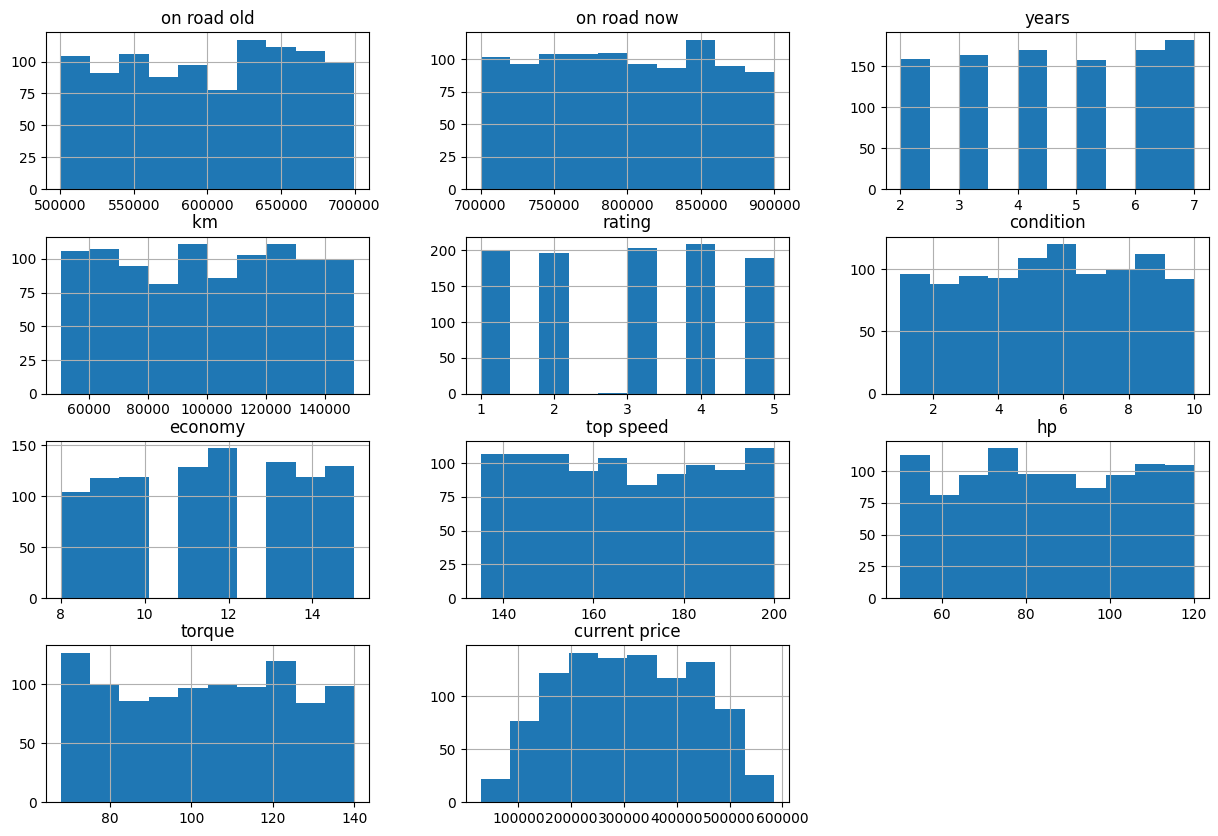

In [8]:
df.hist(figsize=(15,10))

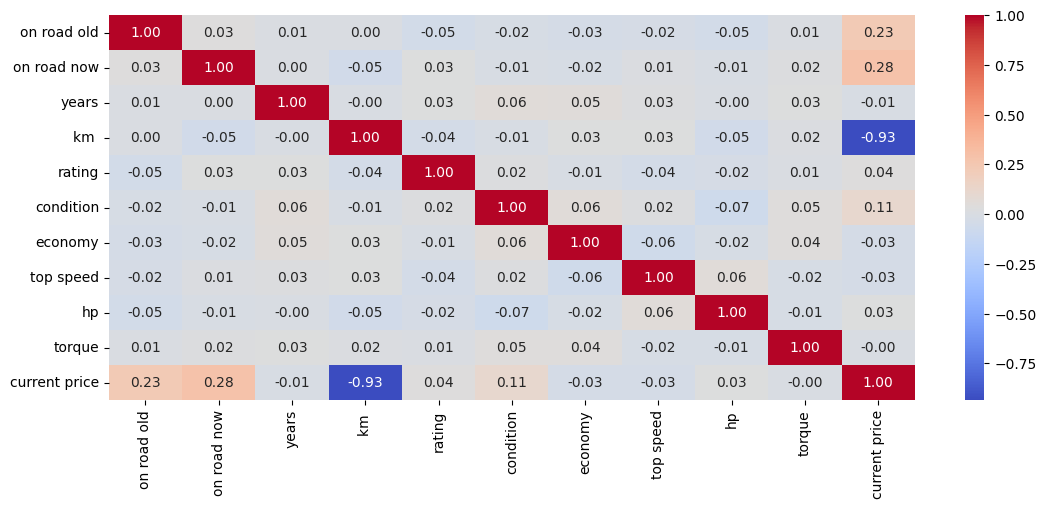

In [9]:
df1=df.drop('Car_name',axis=1)

# Calculate the correlation matrix
corr_matrix = df1.corr()

# Plot the heatmap with a specified figure size
plt.figure(figsize=(13, 5))  # width=15, height=10
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()